In [1]:
import pandas as pd
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

from torch.utils.data import Dataset, DataLoader, TensorDataset, Subset

import matplotlib.pyplot as plt
import seaborn as sns

In [417]:
import pandas as pd

link = (
    "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#S&P_500_component_stocks"
)
df = pd.read_html(link, header=0)[0]

# Write to CSV

df.to_csv("tickers.csv", index=False)

In [424]:
df['Date added'] = pd.to_datetime(df['Date added'], errors='coerce')
df['Symbol'] = df['Symbol'].astype(str)

In [449]:
filtered_df = df[df['Founded'] < '2003']

In [466]:
tickers_list = filtered_df['Symbol'].tolist()

In [447]:
cutoff_date = pd.to_datetime('2010-01-01')
filtered_df = df[df['Date added'] < cutoff_date]

In [436]:
filtered_df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
5,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
7,AES,AES Corporation,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",1998-10-02,874761,1981
8,AFL,Aflac,Financials,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
...,...,...,...,...,...,...,...,...
496,GWW,W. W. Grainger,Industrials,Industrial Machinery & Supplies & Components,"Lake Forest, Illinois",1981-06-30,277135,1927
497,WYNN,Wynn Resorts,Consumer Discretionary,Casinos & Gaming,"Paradise, Nevada",2008-11-14,1174922,2002
498,XEL,Xcel Energy,Utilities,Multi-Utilities,"Minneapolis, Minnesota",1957-03-04,72903,1909
500,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997


In [468]:
import yfinance as yf
stocks = yf.download(tickers = tickers_list, start="2003-01-01", end="2024-01-01")

[*********************100%%**********************]  441 of 441 completed

2 Failed downloads:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2003-01-01 -> 2024-01-01)')
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [472]:
stocks.to_csv("stocks.csv", index = False)

In [563]:
final_df = stocks.dropna(axis=1)['Close']

In [567]:
final_df.to_csv("final_df.csv")

In [491]:
log_returns = np.log(final_df / final_df.shift(1))
log_returns = log_returns.dropna()

In [492]:
log_returns

Ticker,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,WMT,WRB,WST,WY,WYNN,XEL,XOM,YUM,ZBH,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2003-01-03,-0.004713,0.006731,0.009691,0.003540,0.007495,0.026977,0.004238,0.006369,-0.005678,-0.028484,...,-0.031499,-0.018864,-0.020493,-0.005698,-0.007435,0.016601,0.000845,-0.022952,0.002478,0.013537
2003-01-06,0.046663,0.000000,0.006409,-0.009684,0.018495,0.044981,0.059697,0.001586,0.002720,0.028484,...,0.003793,0.028914,-0.008734,0.026253,-0.008243,0.059707,0.024487,0.017764,0.006415,0.011862
2003-01-07,-0.009059,-0.003358,-0.046005,-0.013717,-0.019562,0.035705,0.004697,-0.014366,-0.009427,0.042246,...,0.005365,-0.001751,0.018622,-0.002113,0.001504,-0.037426,-0.034395,0.006382,-0.009886,-0.014386
2003-01-08,-0.049751,-0.020412,0.024900,-0.014241,-0.006965,-0.049615,-0.026668,-0.007261,-0.008511,-0.010561,...,-0.009358,-0.005525,-0.024068,-0.020796,-0.022029,0.065597,-0.004277,0.004760,-0.006479,-0.034802
2003-01-09,0.039078,0.008897,0.003257,0.010617,-0.012443,0.040099,0.048420,0.012872,0.015960,0.013839,...,0.037881,0.005024,-0.002523,0.010160,-0.001537,-0.014389,0.020922,-0.009143,0.006231,0.020035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.004524,-0.005563,0.005057,-0.004324,0.016212,-0.002319,0.004169,0.007444,0.008609,0.003590,...,0.011880,0.006430,0.003302,0.007303,-0.003312,0.008577,0.001768,0.000154,0.007577,0.015335
2023-12-26,0.001718,-0.002845,0.001833,-0.004479,-0.002882,-0.000819,0.008940,0.012930,0.006774,0.009471,...,-0.001533,-0.001568,0.006767,0.007827,0.006394,0.003057,0.002254,0.001998,0.007108,0.022353
2023-12-27,0.000072,0.000518,0.005114,0.000408,0.001103,-0.003651,0.002411,-0.003044,-0.004007,0.000163,...,0.009355,-0.000713,-0.004094,0.003747,-0.004074,-0.011471,-0.004710,0.004443,-0.002391,0.001052


In [493]:
rolling_window_size = 180

# Calculate rolling mean and standard deviation for each stock
rolling_mean = log_returns.rolling(window=rolling_window_size).mean()
rolling_std = log_returns.rolling(window=rolling_window_size).std()

# Standardize the log returns
standardized_log_returns = (log_returns - rolling_mean) / rolling_std

# Optional: Drop the initial rows where the rolling mean and std are NaN
# This will happen for the first (rolling_window_size - 1) days
standardized_log_returns = standardized_log_returns.dropna(how='all')


In [530]:
standardized_log_returns

Ticker,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,WMT,WRB,WST,WY,WYNN,XEL,XOM,YUM,ZBH,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2003-09-19,0.542996,-0.678708,-0.953759,-0.263697,-0.662851,-0.233889,-0.046894,0.399195,0.747233,-0.049537,...,-0.445559,0.239562,-0.637325,-0.909339,0.405345,-0.525853,-0.230615,-0.160735,-0.667505,-0.321215
2003-09-22,-0.790397,-1.069656,-1.101359,-0.651368,-1.389027,-1.263047,-1.101246,-0.375071,-0.923898,-0.937883,...,-1.301748,-1.349130,0.406906,-0.731013,-0.850597,-0.211802,-0.649860,-0.460877,0.397180,-1.497245
2003-09-23,0.237713,0.585058,0.444867,-0.342749,-0.341847,1.175969,0.609178,0.350044,-1.167454,1.211976,...,0.594348,1.133452,1.163716,0.053394,1.977212,0.559254,0.796784,1.019408,1.289494,0.507965
2003-09-24,-2.023729,-2.261566,-1.411570,-1.457877,1.382608,-0.937846,-1.784668,-0.121888,-0.652089,-1.351294,...,-1.217528,-1.860882,-0.658730,-1.221216,-0.336230,-0.985742,-0.412345,-1.011548,0.075354,-1.440857
2003-09-25,-0.363163,-1.894101,-0.019452,0.747561,0.521885,0.648617,-0.165993,-0.331699,-0.431617,-0.425731,...,0.271268,0.192244,-2.195833,-0.349906,-0.095798,-0.972278,0.575741,-1.212932,-0.974038,-1.133699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.260340,-0.539718,0.384127,-0.305922,1.215987,-0.246148,0.238621,0.564678,0.623433,0.143380,...,1.166827,0.427147,0.198145,0.464003,-0.118010,0.807993,0.167954,0.023014,0.568264,0.583703
2023-12-26,0.096050,-0.320603,0.122746,-0.315870,-0.337166,-0.173044,0.537462,0.955572,0.478389,0.486955,...,-0.174692,-0.158230,0.420361,0.507960,0.387337,0.326017,0.198875,0.192923,0.528859,0.835800
2023-12-27,0.001149,-0.042092,0.379524,0.003563,-0.005958,-0.320770,0.131252,-0.168992,-0.334281,-0.060437,...,0.905435,-0.094695,-0.260448,0.221173,-0.161709,-0.921549,-0.275926,0.424318,-0.139769,0.058273


In [495]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis

# Assuming equal weights for simplicity, adjust according to your portfolio
weights = np.full(standardized_log_returns.shape[1], 1/standardized_log_returns.shape[1])

# Calculate portfolio returns as weighted sum of individual asset returns
portfolio_returns = standardized_log_returns.dot(weights)

# Calculate kurtosis using scipy (excess kurtosis, Fisher's definition, subtracts 3)
portfolio_kurtosis = kurtosis(portfolio_returns, fisher=True)

# Calculate kurtosis using pandas (excess kurtosis by default)
# portfolio_kurtosis = portfolio_returns.kurt()

print(f"Portfolio Kurtosis: {portfolio_kurtosis}")


Portfolio Kurtosis: 5.962911988231383


In [496]:
from scipy.stats import shapiro

# Assuming `data` is a 1D numpy array or a pandas Series of your data sample
stat, p = shapiro(log_returns)

print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics=0.854, p=0.000
Sample does not look Gaussian (reject H0)


/Users/calebshim/miniconda3/envs/sml301/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


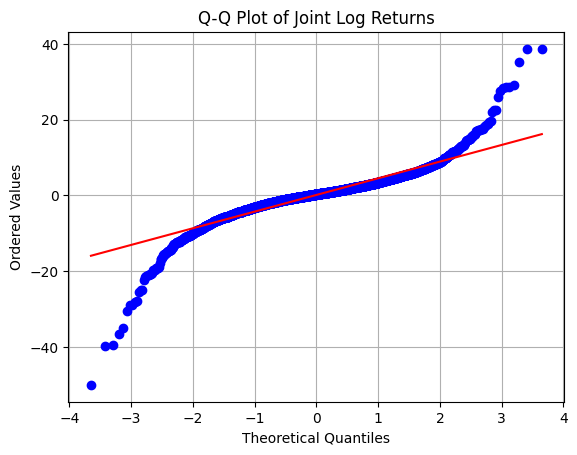

In [501]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing log returns with assets as columns and dates as rows

# Calculate the joint log returns by summing across the columns for each row
# This assumes equal weighting of each asset in the portfolio
joint_log_returns = log_returns.sum(axis=1)

# Now, generate the Q-Q plot for the joint log returns
stats.probplot(joint_log_returns, dist="norm", plot=plt)

plt.title('Q-Q Plot of Joint Log Returns')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)

plt.show()


In [505]:
result.critical_values

array([0.576, 0.656, 0.786, 0.917, 1.091])

In [502]:
from scipy.stats import anderson

result = anderson(joint_log_returns)

print('Anderson-Darling Test')
print('Statistic: %.3f' % result.statistic)
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))


Anderson-Darling Test
Statistic: 117.706
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)


In [531]:
import numpy as np
import pandas as pd

# Assuming 'log_returns' is your DataFrame of log returns for each stock

# Step 1: Convert log returns to simple returns
simple_returns = np.exp(log_returns) - 1

# Step 2: Calculate the average daily simple return for the equally weighted portfolio
n = simple_returns.shape[1]  # Number of stocks
average_daily_simple_returns = simple_returns.mean(axis=1)

# Step 3: Convert the daily simple returns of the portfolio back to log returns
portfolio_log_returns = np.log(1 + average_daily_simple_returns)


In [ ]:
# seeing these plots, it is basically the same as SPY, so will not work on it any longer.

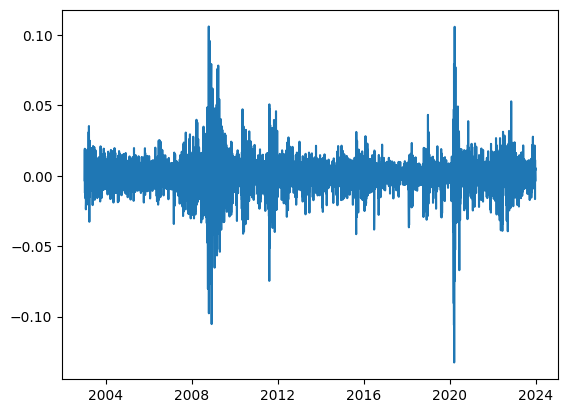

In [533]:
plt.plot(portfolio_log_returns)

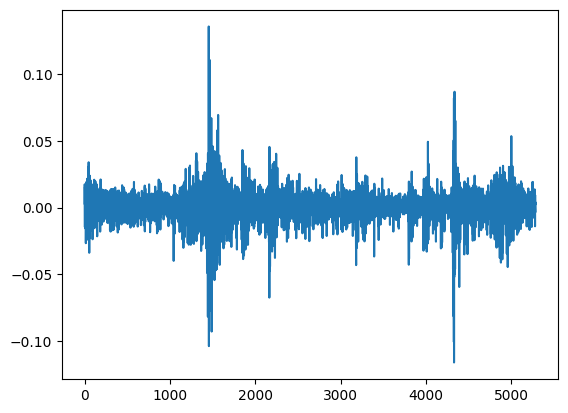

In [534]:
plt.plot(SPY_returns)

In [511]:
train_end - train_end % 64

3776

In [512]:
import pandas as pd
import numpy as np

batch_size = 64

# Calculate the indices for splitting
train_end = int(len(standardized_log_returns) * 0.75)
val_end = int(len(standardized_log_returns) * 0.875)  # Additional 12.5% for validation, totaling 87.5% for train+val

train_end -= train_end % batch_size
val_end -= val_end % batch_size

# Split the data
train_data = standardized_log_returns.iloc[:train_end]
validation_data = standardized_log_returns.iloc[train_end:val_end]
test_data = standardized_log_returns.iloc[val_end:]

print("Training Data Shape:", train_data.shape)
print("Validation Data Shape:", validation_data.shape)
print("Test Data Shape:", test_data.shape)


Training Data Shape: (3776, 371)
Validation Data Shape: (640, 371)
Test Data Shape: (689, 371)


In [552]:
import torch
from torch.utils.data import TensorDataset, DataLoader, Subset
import pandas as pd

# Assuming train_data, validation_data, test_data are your Pandas DataFrames


# Function to convert DataFrame into a 1D PyTorch tensor
def df_to_1d_tensor(df):
    # Flatten the DataFrame to 1D and convert to a PyTorch tensor
    flattened = df.values.flatten(order = 'F')  # Flatten the DataFrame to 1D, order = "F" (Fortran Style) to keep columns intact
    tensor = torch.tensor(flattened, dtype=torch.float32)  # Convert to tensor
    return tensor

# Convert each DataFrame into a 1D tensor
train_tensor = df_to_1d_tensor(train_data)
validation_tensor = df_to_1d_tensor(validation_data)
test_tensor = df_to_1d_tensor(test_data) # note that we do not care for modifying the data to have perfect batches since we will drop the last incomplete batch anyway

# At this point, train_tensor, validation_tensor, and test_tensor are 1D tensors
# containing the sequential days for each stock, one after the other

# Now, to create DataLoader instances, first create TensorDatasets
train_dataset = TensorDataset(train_tensor)
validation_dataset = TensorDataset(validation_tensor)
test_dataset = TensorDataset(test_tensor)

# Define batch size
batch_size = 64

# Create DataLoader instances
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last=True)

# Note: Since the data is now 1D, each "batch" is just a chunk of this 1D tensor
# If you have specific structuring needs for batches (e.g., keeping all data from one stock together),
# you may need to adjust how you're batching in the DataLoader or preprocess the data differently.



In [2]:
SPY = pd.read_csv("SPY.csv")

In [3]:
# Calculate log returns, then standardize with rolling mean and standard deviation
SPY_returns = (np.log(SPY["Close"]) - np.log(SPY["Close"]).shift(1)).dropna()
SPY_returns

1       0.003070
2       0.017471
3      -0.002477
4      -0.014556
5       0.015418
          ...   
5280    0.002008
5281    0.004214
5282    0.001806
5283    0.000378
5284   -0.002899
Name: Close, Length: 5284, dtype: float64

In [302]:
rolling_window = 180

SPY_rolling_mean = SPY_returns.rolling(rolling_window).mean()
SPY_rolling_sd = SPY_returns.rolling(rolling_window).std()

SPY_standardized_returns = ((SPY_returns - SPY_rolling_mean) / SPY_rolling_sd).dropna()

In [5]:
cuda = False
device = torch.device("cuda" if cuda else "cpu")

In [560]:
import torch
from torch import nn
from torch.nn import functional as F


# Encoder Module
class Encoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Encoder, self).__init__()
        
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc_mean = nn.Linear(16, latent_dim)
        self.fc_logvar = nn.Linear(16, latent_dim)

    def forward(self, x):
        h = F.gelu(self.fc1(x))
        h = F.gelu(self.fc2(h))
        return self.fc_mean(h), self.fc_logvar(h)
    
# Decoder Module
class Decoder(nn.Module):
    def __init__(self, output_dim, latent_dim):
        super(Decoder, self).__init__()
        
        self.fc1 = nn.Linear(latent_dim, 16)
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32, output_dim)

    def forward(self, z):
        h = F.gelu(self.fc1(z))
        h = F.gelu(self.fc2(h))
        return self.fc3(h)
    
# VAE 
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = Encoder(input_dim, latent_dim)
        self.decoder = Decoder(input_dim, latent_dim)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        return self.decoder(z), mu, logvar
def loss_function(recon_x, x, mu, logvar):
    MSE = F.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu ** 2 - logvar.exp())
    return  10 * MSE + KLD # there is a weight/regularizer for KLD. We can also penalize MSE instead

# This loss function outputs individual losses too
# def loss_function(recon_x, x, mu, logvar):
#     MSE = F.mse_loss(recon_x, x, reduction='sum')
#     KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
#     return (5 * MSE + KLD), MSE, KLD

In [561]:
# Hyperparameters
input_dim = 64  # Adjust based on your time series length
latent_dim = 8  # Adjust based on desired complexity of the latent space

model = VAE(input_dim, latent_dim)
optimizer = torch.optim.AdamW(model.parameters(), lr=.0001)

In [546]:
# Prepare data and batches
data_tensor = torch.tensor(SPY_standardized_returns.values, dtype=torch.float32)
# if len(data_tensor.shape) == 1:
#     data_tensor = data_tensor.unsqueeze(1)

# Parameters
batch_size = 64  # Example batch size, can be tuned

# Create a TensorDataset and DataLoader
dataset = TensorDataset(data_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, drop_last=True)

In [376]:
total_size = len(data_tensor)
train_size = int(0.75 * total_size) 
validation_size = int(0.125 * total_size) 

train_end = train_size - (train_size % batch_size)

# Adjust validation_size to make it divisible by the batch size
validation_size_adjusted = validation_size - (validation_size % batch_size)

# Recalculate validation_end using the adjusted validation size
validation_end = train_end + validation_size_adjusted

test_end = total_size  # Use up to the end of the dataset

# Create subsets for training, validation, and test datasets
train_dataset = Subset(dataset, range(0, train_end))
validation_dataset = Subset(dataset, range(train_end, validation_end))
test_dataset = Subset(dataset, range(validation_end, test_end))

# Create the DataLoader for each set, shuffle = False to preserve time series structure, drop last batch for Test set
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = False, drop_last = False)
validation_loader = DataLoader(validation_dataset, batch_size = batch_size, shuffle = False, drop_last = False)
test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = False, drop_last = True)

In [ ]:
import datetime

best_val_loss = float('inf')  # Initialize best validation loss to infinity
best_epoch = 0  # Initialize best epoch
base_path = "/Users/calebshim/Downloads/Senior Thesis Code/states/"


now = datetime.datetime.now()
date_time = now.strftime("%Y%m%d_%H%M%S")  # Format: YYYYMMDD_HHMMSS

# Define the base path
base_path = "/Users/calebshim/Downloads/Senior Thesis Code/states/"

# Combine base path with dynamically generated file name
filename = f"{date_time}_model_weights.pth"
path = base_path + filename

In [562]:
import datetime

epochs = 750
best_val_loss = float('inf')  # Initialize best validation loss to infinity
best_epoch = 0  # Initialize best epoch
base_path = "/Users/calebshim/Downloads/Senior Thesis Code/states/"

train_losses = []
validation_losses = []

# train_mse_losses = []
# train_kld_losses = []

# validation_mse_losses = []
# validation_kld_losses = []

for epoch in range(epochs):
    model.train()
    train_loss, train_MSE, train_KLD = 0, 0, 0
    for batch_idx, data in enumerate(train_loader):
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data[0])
        loss = loss_function(recon_batch, data[0], mu, logvar)
        #loss, MSE, KLD = loss_function(recon_batch, data[0], mu, logvar)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        # train_MSE += MSE.item()
        # train_KLD += KLD.item()
    
    train_loss /= len(train_loader.dataset)
    # train_MSE /= len(train_loader.dataset)
    # train_KLD /= len(train_loader.dataset)
    
    train_losses.append(train_loss)
    # train_mse_losses.append(train_MSE)
    # train_kld_losses.append(train_KLD)
    
    model.eval()
    validation_loss, validation_MSE, validation_KLD = 0, 0, 0
    with torch.no_grad():
        for data in validation_loader:
            recon_batch, mu, logvar = model(data[0])
            loss = loss_function(recon_batch, data[0], mu, logvar)
            #loss, MSE, KLD = loss_function(recon_batch, data[0], mu, logvar)
            validation_loss += loss.item()
           # validation_MSE += MSE.item()
            # validation_KLD += KLD.item()

    validation_loss /= len(validation_loader.dataset)
    #validation_MSE /= len(validation_loader.dataset)
    #validation_KLD /= len(validation_loader.dataset)
    
    validation_losses.append(validation_loss)
    #validation_mse_losses.append(validation_MSE)
    #validation_kld_losses.append(validation_KLD)
    
    # Check if this is the best model based on validation loss
    if validation_loss < best_val_loss:
        best_val_loss = validation_loss
        best_epoch = epoch
        
        # Current date and time
        now = datetime.datetime.now()
        date_time = now.strftime("%Y%m%d_%H%M%S")  # Format: YYYYMMDD_HHMMSS
        
        # Combine base path with dynamically generated file name
        filename = f"{date_time}_epoch{epoch}_model_weights.pth"
        path = base_path + filename
        
        # Save the model state
        torch.save(model.state_dict(), path)
        print(f'Saved new best model to {path} at epoch {epoch}')

    if epoch % 10 == 0:
        print(f'---Epoch: {epoch}---')
        print(f'Training Loss: {train_loss:.4f}, Validation Loss: {validation_loss:.4f}')
        #print(f'Training MSE: {train_MSE:.4f}, Training KLD: {train_KLD:.4f}')
        #print(f'Validation MSE: {validation_MSE:.4f}, Validation KLD: {validation_KLD:.4f}')

Saved new best model to /Users/calebshim/Downloads/Senior Thesis Code/states/20240402_234839_epoch0_model_weights.pth at epoch 0
---Epoch: 0---
Training Loss: 9.5683, Validation Loss: 11.7530


KeyboardInterrupt: 

In [318]:
# Save Model
path = "/Users/calebshim/Downloads/Senior Thesis Code/states/240401_final_model_weights.pth"
torch.save(model.state_dict(), path)

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(train_mse_losses, label='Training MSE')
plt.plot(train_kld_losses, label='Training KLD')
plt.plot(validation_mse_losses, label='Validation MSE')
plt.plot(validation_kld_losses, label='Validation KLD')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over time')
plt.legend()
plt.show()

In [89]:
epochs = 500
train_losses = []
validation_losses = []

for epoch in range(epochs):
    # Training phase
    model.train()
    train_loss = 0
    for batch_idx, data in enumerate(train_loader):  # Make sure to use your train_loader here
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data[0])
        loss = loss_function(recon_batch, data[0], mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)
    
    # Validation phase
    model.eval()
    validation_loss = 0
    with torch.no_grad():
        for data in validation_loader:  # Make sure to use your validation_loader here
            recon_batch, mu, logvar = model(data[0])
            loss = loss_function(recon_batch, data[0], mu, logvar)
            validation_loss += loss.item()
    validation_loss /= len(validation_loader.dataset)
    validation_losses.append(validation_loss)
    
    if epoch % 10 == 0:
        print(f'Epoch: {epoch}, Training Loss: {train_loss}, Validation Loss: {validation_loss}')

AttributeError: 'tuple' object has no attribute 'backward'

In [379]:
# Set model to evaluation mode to test
model.eval()

# Get a batch of data
dataiter = iter(dataloader)
batch = next(dataiter)

# Unpack the batch
inputs = batch[0]

originals = []
reconstructions = []

# Send the batch through the VAE to get the reconstructions
# The VAE returns reconstruction, mu, and logvar, but we only need the reconstruction here
with torch.no_grad():  # We're not training, so we don't need to calculate gradients
    for batch in dataloader:
        inputs = batch[0]
        recon, latent_mean, latent_log_var = model(inputs)
        originals.append(inputs)
        reconstructions.append(recon)

        
# Concatenate all the batches together
originals = torch.cat(originals, dim=0).numpy()
reconstructions = torch.cat(reconstructions, dim=0).numpy()

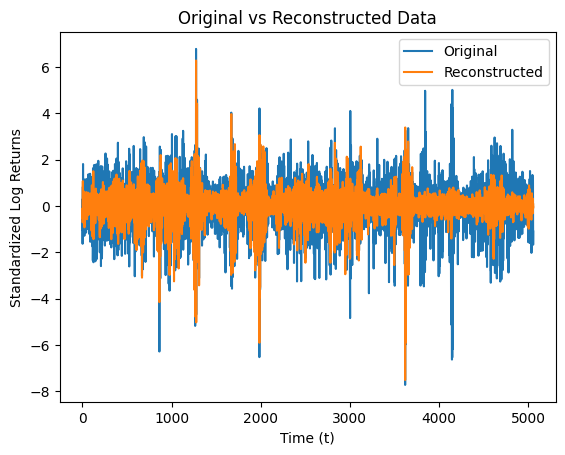

In [380]:
plt.plot(originals, label = "Original")
plt.plot(reconstructions, label = "Reconstructed")
plt.title("Original vs Reconstructed Data")
plt.xlabel("Time (t)")
plt.ylabel("Standardized Log Returns")
plt.legend()

# Save the plot as an image file
#plt.savefig('entire_reconstruction.png', dpi=300, bbox_inches='tight')

In [378]:
path = "states/20240401_143825_epoch605_model_weights.pth"
model.load_state_dict(torch.load(path))
model.eval()

VAE(
  (encoder): Encoder(
    (fc1): Linear(in_features=64, out_features=32, bias=True)
    (fc2): Linear(in_features=32, out_features=16, bias=True)
    (fc_mean): Linear(in_features=16, out_features=8, bias=True)
    (fc_logvar): Linear(in_features=16, out_features=8, bias=True)
  )
  (decoder): Decoder(
    (fc1): Linear(in_features=8, out_features=16, bias=True)
    (fc2): Linear(in_features=16, out_features=32, bias=True)
    (fc3): Linear(in_features=32, out_features=64, bias=True)
  )
)

In [381]:
import torch

# Assuming 'train_loader' is your DataLoader for the training set
model.eval()
mus, logvars = [], []
with torch.no_grad():
    for data in train_loader:
        data = data[0]  # Assuming data[0] contains your input features
        mu, logvar = model.encoder(data)
        mus.append(mu)
        logvars.append(logvar)

In [384]:
# Assuming mus and logvars are lists of tensors
all_mus = torch.cat(mus, dim=0)
all_logvars = torch.cat(logvars, dim=0)


In [328]:
64 * (len(train_loader) + len(validation_loader) + len(test_loader))

5056

In [385]:
import torch
import random

# Assuming 'all_mus' and 'all_logvars' are your aggregated mu and logvar tensors from the VAE
# Also assuming 'model' is your trained VAE and 'decoder' is accessible
num_samples = 100  # The number of Monte Carlo samplings you want to perform
num_days = 5056  # The total number of days in the path
latent_dim = 8  # The size of your latent vector
output_dim = 64  # Assuming each decoded z will return an output of 32 days
z_samples_all = []

# Loop over the number of samples
for n in range(num_samples):
    z_samples = []
    # Generate latent vectors for each 32-day segment in the 640-day path
    for _ in range(num_days // output_dim):
        z = torch.empty(latent_dim)
        for i in range(latent_dim):
            random_index = random.randint(0, len(all_mus) - 1)
            selected_mu = all_mus[random_index]
            selected_logvar = all_logvars[random_index]

            # Reparameterization trick to sample the i-th entry in z
            std = torch.exp(0.5 * selected_logvar)
            eps = torch.randn_like(std)
            z[i] = selected_mu + eps * std
            
        # Append the sample latent vector z for the current 32-day segment
        z_samples.append(z)

    # Decode the batch of latent vectors to get the returns
    z_samples_tensor = torch.stack(z_samples)
    with torch.no_grad():
        # Assuming the model's decoder can process the entire batch of latent vectors at once
        decoded_samples = model.decoder(z_samples_tensor).view(-1).cpu().numpy()
    z_samples_all.append(decoded_samples)

# 'z_samples_all' is now a list where each element is a numpy array representing one 640-day path
# You now have 100 such paths to use for VaR calculation


In [ ]:
rolling_window = 180

SPY_rolling_mean = SPY_returns.rolling(rolling_window).mean()
SPY_rolling_sd = SPY_returns.rolling(rolling_window).std()

SPY_standardized_returns = ((SPY_returns - SPY_rolling_mean) / SPY_rolling_sd).dropna()

In [335]:
SPY_rolling_sd[-5056:]

229     0.009684
230     0.009452
231     0.009449
232     0.009439
233     0.009441
          ...   
5280    0.007504
5281    0.007509
5282    0.007509
5283    0.007500
5284    0.007448
Name: Close, Length: 5056, dtype: float64

In [386]:
all_destandardized_samples = []

# Loop over each realization and destandardize
for samples in z_samples_all:
    # Flatten the samples for each path to match the rolling window format
    # Destandardize the samples using the pre-calculated rolling mean and std
    destandardized_samples = SPY_rolling_sd[-5056:] * samples + SPY_rolling_mean[-5056:]
    all_destandardized_samples.append(destandardized_samples)

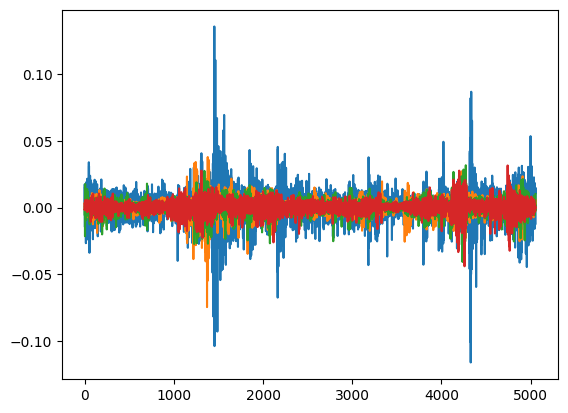

In [387]:
x_index = np.arange(0, 5056)
plt.plot(x_index, SPY_returns[:test_end - (test_end % batch_size)])
plt.plot(x_index, all_destandardized_samples[0])
plt.plot(x_index, all_destandardized_samples[1])
plt.plot(x_index, all_destandardized_samples[2])

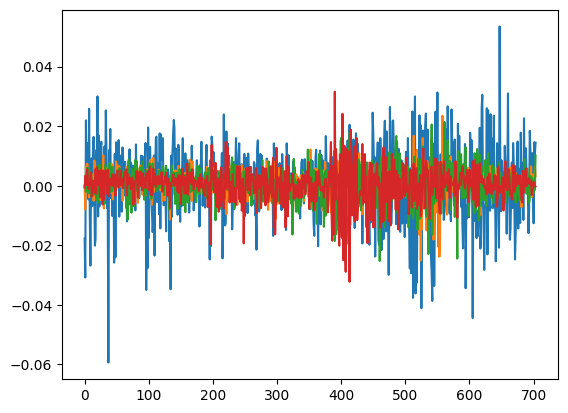

In [388]:
x_index = np.arange(0, 704)
plt.plot(x_index, SPY_returns[validation_end:test_end - (test_end % batch_size)])
plt.plot(x_index, all_destandardized_samples[0][validation_end:test_end - (test_end % batch_size)])
plt.plot(x_index, all_destandardized_samples[1][validation_end:test_end - (test_end % batch_size)])
plt.plot(x_index, all_destandardized_samples[2][validation_end:test_end - (test_end % batch_size)])

In [389]:
import numpy as np
import time

tic = time.perf_counter()

# Define the rolling window size for VaR calculation and the confidence level
rolling_window_size = 180
confidence_level = 0.05  # 95% confidence

# Function to calculate the rolling VaR for one path
def calculate_rolling_var(path, window_size, confidence_level):
    # Initialize the array to store the VaR
    var_path = np.full(path.shape, np.nan)

    # Compute the VaR for each day using a rolling window
    for i in range(window_size, len(path)):
        window = path[i-window_size:i]
        var_path[i] = -np.percentile(window, confidence_level * 100)  # Negative sign for loss
    return var_path

# Calculate the VaR for each path
var_paths = np.array([calculate_rolling_var(path, rolling_window_size, confidence_level) for path in all_destandardized_samples])

# Calculate the average VaR across all paths
average_var = np.nanmean(var_paths, axis=0)  # Ignore the NaNs from the start of the series
worst_case_var = np.nanmax(var_paths, axis=0)

# average_var now holds the average VaR at each day across all simulated paths
toc = time.perf_counter()
print(toc - tic)

76.87875983200502


/var/folders/4t/vhwwrb2x58sfg08rzrwzk78r0000gn/T/ipykernel_89949/676040215.py:25: RuntimeWarning: Mean of empty slice
  average_var = np.nanmean(var_paths, axis=0)  # Ignore the NaNs from the start of the series
/var/folders/4t/vhwwrb2x58sfg08rzrwzk78r0000gn/T/ipykernel_89949/676040215.py:26: RuntimeWarning: All-NaN slice encountered
  worst_case_var = np.nanmax(var_paths, axis=0)


In [578]:
import numpy as np
import time

def rolling_window(a, window):
    """Create a rolling window view of the array 'a' with a given window size."""
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

def calculate_rolling_var_optimized(all_paths, window_size, confidence_level):
    """Calculate the rolling VaR for all paths using optimized methods."""
    num_paths, num_points = all_paths.shape
    var_paths = np.full(all_paths.shape, np.nan)  # Initialize the Var array
    
    # Use a rolling window view for each path
    for path_idx in range(num_paths):
        rolling_views = rolling_window(all_paths[path_idx], window_size)
        var_paths[path_idx, window_size-1:] = -np.percentile(rolling_views, confidence_level * 100, axis=1)
        
    # Calculate the average and worst-case VaR across all paths
    average_var = np.nanmean(var_paths, axis=0)  # Average VaR
    worst_case_var = np.nanmax(var_paths, axis=0)  # Worst-case VaR
    
    return average_var, worst_case_var

# Example usage
tic = time.perf_counter()

# Define the rolling window size for VaR calculation and the confidence level
rolling_window_size = 180
confidence_level = 0.05  # 95% confidence

# Assuming all_destandardized_samples is defined elsewhere and is a numpy array
#all_destandardized_samples = np.random.normal(0, 1, (10, 365))  # Example data
all_destandardized_samples_array = np.stack(all_destandardized_samples)
# Optimize VaR calculation
average_var, worst_case_var = calculate_rolling_var_optimized(all_destandardized_samples_array, rolling_window_size, confidence_level)

toc = time.perf_counter()
print(f"Optimized calculation time: {toc - tic} seconds")


Optimized calculation time: 2.9940057389903814 seconds


/var/folders/4t/vhwwrb2x58sfg08rzrwzk78r0000gn/T/ipykernel_89949/3129506083.py:21: RuntimeWarning: Mean of empty slice
  average_var = np.nanmean(var_paths, axis=0)  # Average VaR
/var/folders/4t/vhwwrb2x58sfg08rzrwzk78r0000gn/T/ipykernel_89949/3129506083.py:22: RuntimeWarning: All-NaN slice encountered
  worst_case_var = np.nanmax(var_paths, axis=0)  # Worst-case VaR


In [130]:
latent_dim = 4  # The size of your latent vector
z = torch.empty(latent_dim)

# Randomly select mu and sigma pairs and sample each entry in z
for i in range(latent_dim):
    random_index = random.randint(0, len(mus) - 1)
    selected_mu = all_mus[random_index]
    selected_logvar = all_logvars[random_index]

    # Reparameterization trick to sample the i-th entry in z
    std = torch.exp(0.5 * selected_logvar)
    eps = torch.randn_like(std)
    z[i] = selected_mu + eps * std

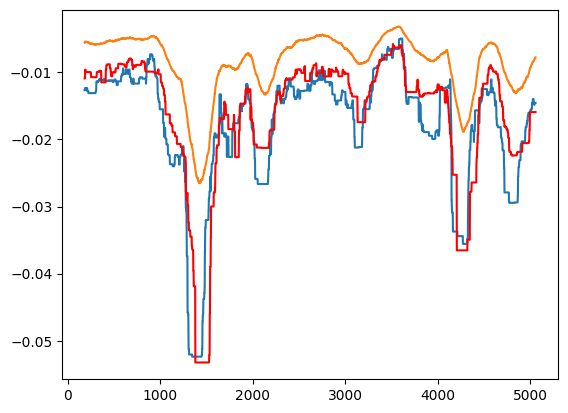

In [390]:
x_index = range(5056)
plt.plot(x_index,rolling_VaR_95)
plt.plot(x_index, -average_var)
plt.plot(x_index, -worst_case_var, color = 'red')

ValueError: x and y must have same first dimension, but have shapes (1248,) and (640,)

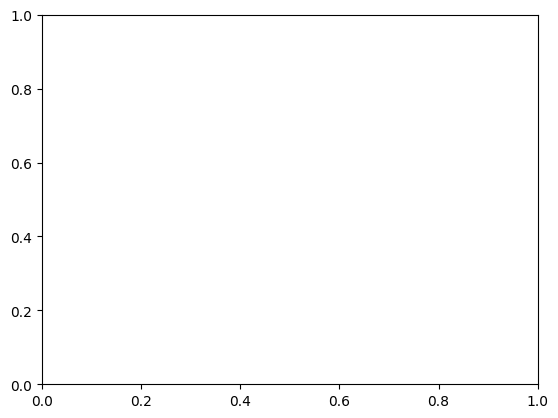

In [285]:
plt.plot(x_index, rolling_VaR_95[validation_end:test_end])
plt.plot(x_index, -var_paths[0])
plt.plot(x_index, -var_paths[1])
plt.plot(x_index, -var_paths[2])
plt.plot(x_index, -var_paths[3])

In [132]:
import random
# Initialize a latent vector z of size 4
latent_dim = 4  # The size of your latent vector

# Randomly select mu and sigma pairs and sample each entry in z
z_samples = []
for day in range(20): # because 640 test days / 32(output dim) = 20
    z = torch.empty(latent_dim)
    for i in range(latent_dim):
        random_index = random.randint(0, len(mus) - 1)
        selected_mu = all_mus[random_index]
        selected_logvar = all_logvars[random_index]

        # Reparameterization trick to sample the i-th entry in z
        std = torch.exp(0.5 * selected_logvar)
        eps = torch.randn_like(std)
        z[i] = selected_mu + eps * std
    z_samples.append(z)


# Now, 'z' is a randomly sampled latent vector with each entry coming from a different mu-sigma pair

In [278]:
# Calculate rolling mean and standard deviation with the same window size used for standardization
rolling_window_size = 180

rolling_mean = (SPY_returns.rolling(window=rolling_window_size).mean()).dropna()
rolling_std = (SPY_returns.rolling(window=rolling_window_size).std()).dropna()

rolling_mean = rolling_mean[0:test_end - (test_end % batch_size)]
rolling_std = rolling_std[0:test_end - (test_end % batch_size)]

In [137]:
new_samples = []
for z in z_samples:
    with torch.no_grad():
        new_sample = model.decoder(z)
    new_samples.append(new_sample.detach().numpy())


In [279]:
flattened_samples = np.concatenate(new_samples)
destandardized_samples = rolling_std[validation_end:test_end] * flattened_samples + rolling_mean[validation_end:test_end]

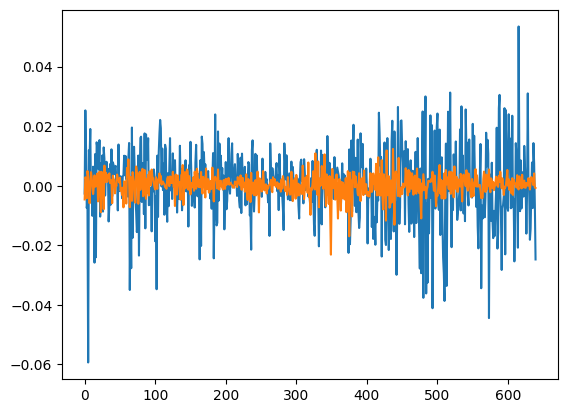

In [142]:
x_index = np.arange(0, 640)
plt.plot(x_index, SPY_returns[validation_end:test_end - (test_end % batch_size)])
plt.plot(x_index, destandardized_samples)

In [392]:
actual_returns_min = SPY_returns.min()
actual_returns_max = SPY_returns.max()
actual_returns_normalized = (SPY_returns - actual_returns_min) / (actual_returns_max - actual_returns_min)


reconstructed_returns_min = flat_latent_samples.min()
reconstructed_returns_max = flat_latent_samples.max()
reconstructed_returns_normalized = (flat_latent_samples - reconstructed_returns_min) / (reconstructed_returns_max - reconstructed_returns_min)

<Axes: xlabel='Close', ylabel='Density'>

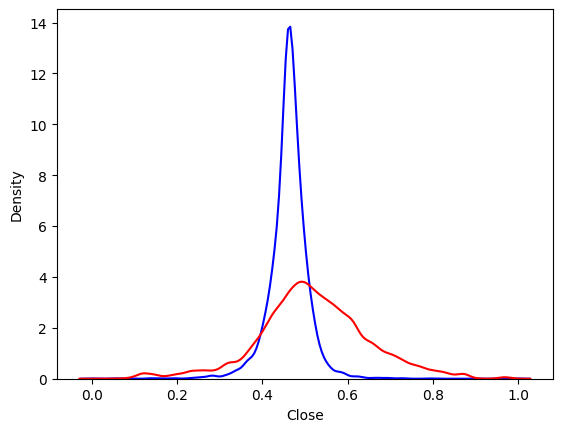

In [393]:
sns.kdeplot(actual_returns_normalized, label="Input Standardized Returns", color='blue')
sns.kdeplot(reconstructed_returns_normalized, label="VAE Returns", color='red')

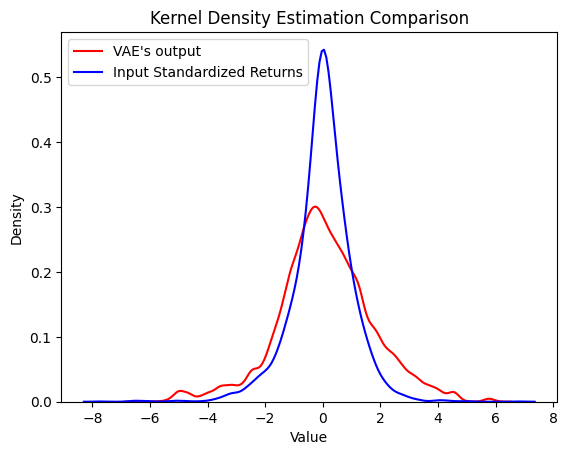

In [391]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `mu_tensor` and `logvar_tensor` are your aggregated mu and logvar tensors from the VAE

# Step 1: Sample points from the latent distributions
# Calculate standard deviation from logvar
std_tensor = torch.exp(0.5 * all_logvars)
# Number of samples you want to generate from each latent distribution
num_samples = 1000
# Initialize a tensor to hold all the generated samples
latent_samples = torch.zeros(num_samples, all_mus.size(0))

# Use the reparameterization trick to sample from the latent distributions
for i in range(all_mus.size(0)):
    eps = torch.randn(num_samples)
    latent_samples[:, i] = all_mus[i] + eps * std_tensor[i]

# Flatten the latent_samples to get a 1D array of samples
flat_latent_samples = latent_samples.view(-1).numpy()

# Step 2: Use the actual standardized training data
# Assuming `standardized_data` is a 1D numpy array of your standardized training data
# flat_standardized_data = standardized_data.reshape(-1)  # If your data is not already flat

# Step 3: Apply KDE to both distributions
sns.kdeplot(flat_latent_samples, label="VAE's output", color='red')
sns.kdeplot(SPY_standardized_returns, label="Input Standardized Returns", color='blue')

# Step 4: Plot the KDEs together
plt.title('Kernel Density Estimation Comparison')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a pandas Series 'returns' with your daily returns
confidence_level = 0.95
rolling_window_size = 180  # Adjust as needed, considering you're looking at 1-day ahead VaR

aligned_returns = SPY_returns[180:5236]
# Calculate the rolling VaR (95% confidence)
rolling_VaR_95 = aligned_returns.rolling(window=rolling_window_size).quantile(1 - confidence_level).shift(1)
# rolling_reconstructed_VaR_95 = destandardized_reconstruction.rolling(window=rolling_window_size).quantile(1 - confidence_level).shift(1)

# # Calculate the rolling VaR (99% confidence)
# rolling_VaR_99 = aligned_returns.rolling(window=rolling_window_size).quantile(1 - 0.99).shift(1)
# rolling_reconstructed_VaR_99 = destandardized_reconstruction.rolling(window=rolling_window_size).quantile(1 - 0.99).shift(1)

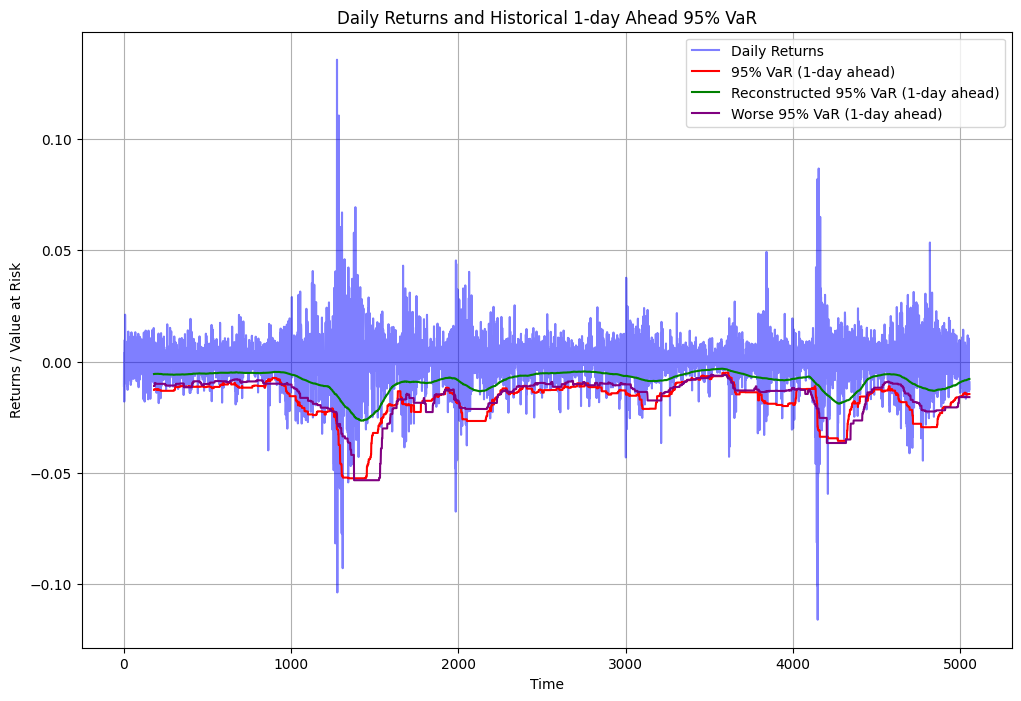

In [395]:
x_index = range(5056)
# Plotting
plt.figure(figsize=(12, 8))

# Plot returns
plt.plot(x_index, aligned_returns, label='Daily Returns', color='blue', alpha=0.5)

# Plot VaR
plt.plot(x_index, rolling_VaR_95, label='95% VaR (1-day ahead)', color='red', linestyle='-')
plt.plot(x_index, - average_var, label='Reconstructed 95% VaR (1-day ahead)', color='green', linestyle='-')
plt.plot(x_index, - worst_case_var, label='Worse 95% VaR (1-day ahead)', color='purple', linestyle='-')


plt.title('Daily Returns and Historical 1-day Ahead 95% VaR')
plt.xlabel('Time')
plt.ylabel('Returns / Value at Risk')
plt.legend()
plt.grid(True)
plt.show()

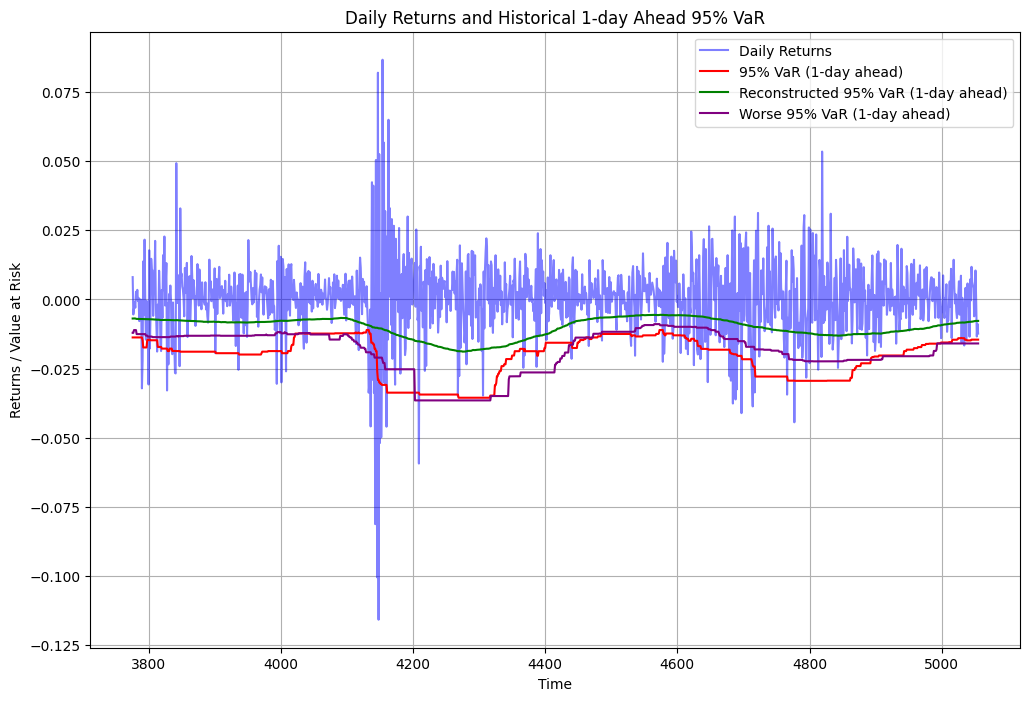

In [396]:
x_index = np.arange(train_end, 5056)

# Plotting
plt.figure(figsize=(12, 8))

# Plot returns
plt.plot(x_index, aligned_returns[train_end:test_end], label='Daily Returns', color='blue', alpha=0.5)

# Plot VaR
plt.plot(x_index, rolling_VaR_95[train_end:test_end], label='95% VaR (1-day ahead)', color='red', linestyle='-')
plt.plot(x_index, - average_var[train_end:test_end], label='Reconstructed 95% VaR (1-day ahead)', color='green', linestyle='-')
plt.plot(x_index, - worst_case_var[train_end:test_end], label='Worse 95% VaR (1-day ahead)', color='purple', linestyle='-')


plt.title('Daily Returns and Historical 1-day Ahead 95% VaR')
plt.xlabel('Time')
plt.ylabel('Returns / Value at Risk')
plt.legend()
plt.grid(True)
plt.show()

In [397]:
# Regulatory Loss Function (RQLt)
RQLt = np.where(aligned_returns[validation_end:test_end] < rolling_VaR_95[validation_end:test_end], 1 + (rolling_VaR_95[validation_end:test_end] - aligned_returns[validation_end:test_end]) ** 2, 0)

# Linear Loss Function (LLt)
LLt = np.abs(aligned_returns[validation_end:test_end] - rolling_VaR_95[validation_end:test_end])

# Quadratic Loss Function (QLt)
QLt = (aligned_returns[validation_end:test_end] - rolling_VaR_95[validation_end:test_end]) ** 2

In [398]:
# Regulatory Loss Function (RQLt)
RQLt_vae = np.where(aligned_returns[validation_end:test_end] < -  average_var[validation_end:test_end], 1 + (- average_var[validation_end:test_end] - aligned_returns[validation_end:test_end]) ** 2, 0)

# Linear Loss Function (LLt)
LLt_vae = np.abs(aligned_returns[validation_end:test_end] -  - average_var[validation_end:test_end])

# Quadratic Loss Function (QLt)
QLt_vae = (aligned_returns[validation_end:test_end] -  - average_var[validation_end:test_end]) ** 2

In [399]:
# Regulatory Loss Function (RQLt)
RQLt_worst = np.where(aligned_returns[validation_end:test_end] < -  worst_case_var[validation_end:test_end], 1 + (- worst_case_var[validation_end:test_end] - aligned_returns[validation_end:test_end]) ** 2, 0)

# Linear Loss Function (LLt)
LLt_worst = np.abs(aligned_returns[validation_end:test_end] -  - worst_case_var[validation_end:test_end])

# Quadratic Loss Function (QLt)
QLt_worst = (aligned_returns[validation_end:test_end] -  - worst_case_var[validation_end:test_end]) ** 2

In [400]:
np.sum(RQLt), np.sum(RQLt_vae), np.sum(RQLt_worst)

(37.002771928694116, 116.01390400193226, 53.00584538122379)

In [401]:
np.sum(LLt), np.sum(LLt_vae), np.sum(LLt_worst)

(14.136117318326047, 8.75198275755725, 13.213247742802078)

In [402]:
np.sum(QLt), np.sum(QLt_vae), np.sum(QLt_worst)

(0.3779399329928085, 0.16464141631272333, 0.33106159556561876)

In [403]:
breaches = aligned_returns[train_end:test_end] < rolling_VaR_95[train_end:test_end]

# Calculate the number of breaches
num_breaches = np.sum(breaches)

# Calculate the expected number of breaches at a 95% confidence level
expected_breaches = len(rolling_VaR_95[train_end:test_end]) * 0.05

num_breaches, expected_breaches

(73, 64.0)

In [410]:
breaches = aligned_returns < - worst_case_var

# Calculate the number of breaches
num_breaches = np.sum(breaches)

# Calculate the expected number of breaches at a 95% confidence level
expected_breaches = len(aligned_returns) * 0.05

num_breaches, expected_breaches

(360, 252.8)

In [405]:
breaches = aligned_returns[train_end:test_end] < - worst_case_var[train_end:test_end]

# Calculate the number of breaches
num_breaches = np.sum(breaches)

# Calculate the expected number of breaches at a 95% confidence level
expected_breaches = len(aligned_returns[train_end:test_end]) * 0.05

num_breaches, expected_breaches

(100, 64.0)

In [408]:
64 / len(aligned_returns[train_end:test_end]) 

0.05

In [409]:
100 / len(aligned_returns[train_end:test_end]) 

0.078125